In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_import = pd.read_csv('2018-2010_import.csv')
df_export = pd.read_csv('2018-2010_export.csv')

In [3]:
df_import['value'].describe()

count    79068.000000
mean        63.289855
std        666.652363
min          0.000000
25%          0.030000
50%          0.380000
75%          4.910000
max      32781.570000
Name: value, dtype: float64

In [5]:
df_import.head(5)

,HSCode,Commodity,value,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.00,AFGHANISTAN TIS,2018
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN TIS,2018
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,268.60,AFGHANISTAN TIS,2018
3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN TIS,2018
4,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...,NaN,AFGHANISTAN TIS,2018


In [6]:
df_export.head(5)

,HSCode,Commodity,value,country,year
0,2,MEAT AND EDIBLE MEAT OFFAL.,0.18,AFGHANISTAN TIS,2018
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.00,AFGHANISTAN TIS,2018
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,12.48,AFGHANISTAN TIS,2018
3,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.00,AFGHANISTAN TIS,2018
4,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,1.89,AFGHANISTAN TIS,2018


In [7]:
#we have nan Values in dataset
df_import.isnull().sum()

HSCode           0
Commodity        0
value        14027
country          0
year             0
dtype: int64

In [8]:
df_export.isnull().sum()

HSCode           0
Commodity        0
value        14038
country          0
year             0
dtype: int64

In [9]:
df_export.describe()
#Values is showing a huge outlier

,HSCode,value,year
count,137023.000000,122985.000000,137023.000000
mean,51.330302,21.567829,2014.056304
std,28.018026,229.701279,2.580160
min,1.000000,0.000000,2010.000000
25%,28.000000,0.030000,2012.000000
50%,52.000000,0.360000,2014.000000
75%,74.000000,3.770000,2016.000000
max,99.000000,19805.170000,2018.000000


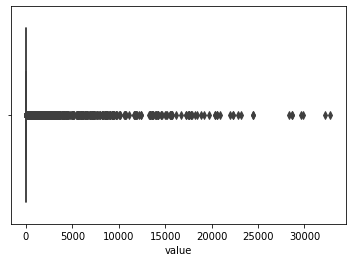

In [10]:
sns.boxplot(df_import['value'])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


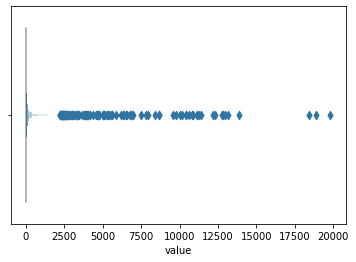

In [11]:
sns.boxenplot(df_export['value'])

In [12]:
df_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93095 entries, 0 to 93094
Data columns (total 5 columns):
HSCode       93095 non-null int64
Commodity    93095 non-null object
value        79068 non-null float64
country      93095 non-null object
year         93095 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.6+ MB


In [13]:
df_export.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137023 entries, 0 to 137022
Data columns (total 5 columns):
HSCode       137023 non-null int64
Commodity    137023 non-null object
value        122985 non-null float64
country      137023 non-null object
year         137023 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.2+ MB


##### Code Cleanup

In [14]:
df_import[df_import.value == 0].head()

,HSCode,Commodity,value,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.0,AFGHANISTAN TIS,2018
9,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",0.0,AFGHANISTAN TIS,2018
11,41,RAW HIDES AND SKINS (OTHER THAN FURSKINS) AND ...,0.0,AFGHANISTAN TIS,2018
20,81,OTHER BASE METALS; CERMETS; ARTICLES THEREOF.,0.0,AFGHANISTAN TIS,2018
22,84,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...",0.0,AFGHANISTAN TIS,2018


In [15]:
df_export[df_export.value == 0].head()

,HSCode,Commodity,value,country,year
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.0,AFGHANISTAN TIS,2018
3,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.0,AFGHANISTAN TIS,2018
14,18,COCOA AND COCOA PREPARATIONS.,0.0,AFGHANISTAN TIS,2018
26,31,FERTILISERS.,0.0,AFGHANISTAN TIS,2018
32,37,PHOTOGRAPHIC OR CINEMATOGRAPHIC GOODS.,0.0,AFGHANISTAN TIS,2018


In [16]:
df_import[df_import.country == 'UNSPECIFIED'].head()

,HSCode,Commodity,value,country,year
8263,1,LIVE ANIMALS.,NaN,UNSPECIFIED,2018
8264,2,MEAT AND EDIBLE MEAT OFFAL.,NaN,UNSPECIFIED,2018
8265,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",3.1,UNSPECIFIED,2018
8266,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,0.1,UNSPECIFIED,2018
8267,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",NaN,UNSPECIFIED,2018


In [17]:
df_import.duplicated().sum() #Duplicate Import

18002

In [18]:
df_export.duplicated().sum() #Duplicat Export

0

In [50]:
def cleanup(data_df):
    data_df['country'] = data_df['country'].apply(lambda x: np.NaN if x== "UNSPECIFIED" else x)
    
    data_df = data_df[data_df.value!= 0]
    data_df.dropna(inplace =True)
    data_df.year = pd.Categorical(data_df.year)
    data_df.drop_duplicates(keep ='first', inplace =True)
    return data_df

In [51]:
df_import =cleanup(df_import)
df_export =cleanup(df_export)

In [57]:
df_import.isnull().any()

HSCode       False
Commodity    False
value        False
country      False
year         False
dtype: bool

In [58]:
df_export.isna().any()

HSCode       False
Commodity    False
value        False
country      False
year         False
dtype: bool

In [60]:
df_import['Commodity'].nunique()

98

In [61]:
df_export['Commodity'].nunique()

98

In [64]:
pd.DataFrame(df_import['Commodity'].value_counts()).head(5)  #value counts

,Commodity
"ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.",1378
IRON AND STEEL,1333
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",1314
ALUMINIUM AND ARTICLES THEREOF.,1217
PLASTIC AND ARTICLES THEREOF.,1112


In [65]:
pd.DataFrame(df_export['Commodity'].value_counts()).head(5)

,Commodity
PHARMACEUTICAL PRODUCTS,1807
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",1793
"ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.",1742
"VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING STOCK, AND PARTS AND ACCESSORIES THEREOF.",1731
PLASTIC AND ARTICLES THEREOF.,1706


In [67]:
df_import['country'].nunique()

240

In [68]:
df_export['country'].nunique()

246

##### GroupBy

In [69]:
df3 = df_import.groupby('year').agg({'value':'sum'})

df4 = df_export.groupby('year').agg({'value':'sum'})

In [71]:
df3['Trade Deficit'] = df4.value -df3.value
df3

,value,Trade Deficit
year,,
2010,365444.94,-130033.93
2011,488272.63,-198761.05
2012,488805.22,-193858.35
2013,446095.99,-143251.86
2014,440463.87,-134304.07
2015,372291.40,-112499.98
2016,377006.72,-103641.56
2017,456379.59,-155301.41
2018,513981.62,-186830.19
